# Data analysis with Python - FreeCodeCamp

## Introduction.

For the analysis of a data frame we will follow the netx steps in order. 


### First step: import libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math


### Second step: Open data source

In this case we're gonna work with a CSV file, so we open it with "pd.read_csv()" and put in the braces the route of the file.

In [2]:
df = pd.read_csv("D:/Cursos/Data analysis FCC/Project-Credit-Card/files/creditcardmarketing_clean.csv")

We can get a glance of the data frame with df.head()

df.shape give us the rows and columns oth the df

df.info() gives us the data type of each row

with df.describe() we can get the statistical properties of df's columns. 

In [3]:

df.head()


,Customer Number,Offer Accepted,Reward,Mailer Type,Income Level,# Bank Accounts Open,Overdraft Protection,Credit Rating,# Credit Cards Held,# Homes Owned,Household Size,Own Your Home,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,"1160,75",1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,"147,25",39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,"276,5",367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211,2140.0,1357.0,982.0,365.0


**Change headers**: We hace to change the format of the headers replacing spaces with underbars. To this we proceed as the following:

In [4]:
def renaming(x):
    return x.replace(" ","_")

new_df = df.rename(renaming, axis = "columns")
new_df

,Customer_Number,Offer_Accepted,Reward,Mailer_Type,Income_Level,#_Bank_Accounts_Open,Overdraft_Protection,Credit_Rating,#_Credit_Cards_Held,#_Homes_Owned,Household_Size,Own_Your_Home,Average_Balance,Q1_Balance,Q2_Balance,Q3_Balance,Q4_Balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,"1160,75",1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,"147,25",39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,"276,5",367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211,2140.0,1357.0,982.0,365.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,17996,No,Cash Back,Letter,High,1,No,Low,1,1,5,Yes,"167,5",136.0,65.0,71.0,398.0
17996,17997,No,Cash Back,Letter,High,1,No,Low,3,1,3,Yes,"850,5",984.0,940.0,943.0,535.0
17997,17998,No,Cash Back,Letter,High,1,No,Low,2,1,4,No,"1087,25",918.0,767.0,1170.0,1494.0
17998,17999,No,Cash Back,Letter,Medium,1,No,Medium,4,2,2,Yes,"1022,25",626.0,983.0,865.0,1615.0


In [5]:
new_df.shape

(18000, 17)

In [6]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer_Number       18000 non-null  int64  
 1   Offer_Accepted        18000 non-null  object 
 2   Reward                18000 non-null  object 
 3   Mailer_Type           18000 non-null  object 
 4   Income_Level          18000 non-null  object 
 5   #_Bank_Accounts_Open  18000 non-null  int64  
 6   Overdraft_Protection  18000 non-null  object 
 7   Credit_Rating         18000 non-null  object 
 8   #_Credit_Cards_Held   18000 non-null  int64  
 9   #_Homes_Owned         18000 non-null  int64  
 10  Household_Size        18000 non-null  int64  
 11  Own_Your_Home         18000 non-null  object 
 12  Average_Balance       17976 non-null  object 
 13  Q1_Balance            17976 non-null  float64
 14  Q2_Balance            17976 non-null  float64
 15  Q3_Balance         

In [7]:
new_df.describe()

,Customer_Number,#_Bank_Accounts_Open,#_Credit_Cards_Held,#_Homes_Owned,Household_Size,Q1_Balance,Q2_Balance,Q3_Balance,Q4_Balance
count,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,17976.000000,17976.000000,17976.000000,17976.000000
mean,9000.500000,1.255778,1.903500,1.203444,3.499056,910.450656,999.392190,1042.033600,810.185803
std,5196.296758,0.472501,0.797009,0.427341,1.114182,620.077060,457.402268,553.452599,559.001365
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4500.750000,1.000000,1.000000,1.000000,3.000000,392.750000,663.000000,633.000000,363.000000
50%,9000.500000,1.000000,2.000000,1.000000,3.000000,772.000000,1032.000000,945.500000,703.000000
75%,13500.250000,1.000000,2.000000,1.000000,4.000000,1521.000000,1342.000000,1463.000000,1212.000000
max,18000.000000,3.000000,4.000000,3.000000,9.000000,3450.000000,3421.000000,3823.000000,4215.000000


### Numerical analysis and visualization.

Now, we will analyze a column of the df i.e "Average Balance". For this we use df['column name'].function(). Function could be the last four we saw before. 
By the way, we have to wrangling the data becouse we have data types that doesn't match with the data i.e we have numbers as object-type, so is necesary to change to int/float 64. 

**Note**: decimals must be with "." instead "," then we have to change it first to proceed. Otherwise it'll throw error.

In [8]:
new_df['Average_Balance'] = new_df['Average_Balance'].str.replace(',','.')
new_df['Average_Balance'] = new_df['Average_Balance'].astype(np.float)





C:\Users\Daniel\AppData\Local\Temp\ipykernel_22260\2375764737.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  new_df['Average_Balance'] = new_df['Average_Balance'].astype(np.float)


In [9]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer_Number       18000 non-null  int64  
 1   Offer_Accepted        18000 non-null  object 
 2   Reward                18000 non-null  object 
 3   Mailer_Type           18000 non-null  object 
 4   Income_Level          18000 non-null  object 
 5   #_Bank_Accounts_Open  18000 non-null  int64  
 6   Overdraft_Protection  18000 non-null  object 
 7   Credit_Rating         18000 non-null  object 
 8   #_Credit_Cards_Held   18000 non-null  int64  
 9   #_Homes_Owned         18000 non-null  int64  
 10  Household_Size        18000 non-null  int64  
 11  Own_Your_Home         18000 non-null  object 
 12  Average_Balance       17976 non-null  float64
 13  Q1_Balance            17976 non-null  float64
 14  Q2_Balance            17976 non-null  float64
 15  Q3_Balance         

In [10]:
new_df['Average_Balance'].describe()

count    17976.000000
mean       940.515562
std        350.297837
min         48.250000
25%        787.500000
50%       1007.000000
75%       1153.250000
max       3366.250000
Name: Average_Balance, dtype: float64

Now we can explore the chosen column easier. So we will get the mean, median and will plot the boxplot, density plot an histogram. 

#### Mean

In [11]:
mean = new_df['Average_Balance'].mean()
mean = round(mean,2)
print(mean)

940.52


#### Median

In [12]:
median = new_df['Average_Balance'].median()
median = round(median,2)
print(median)

1007.0


#### Boxplot

<AxesSubplot:>

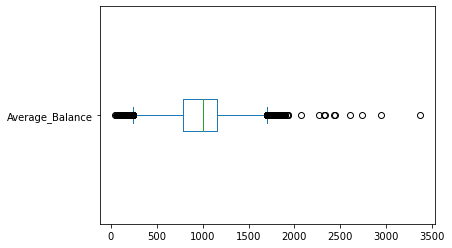

In [13]:
new_df['Average_Balance'].plot(kind = "box", vert = False)

#### Density plot

<AxesSubplot:ylabel='Density'>

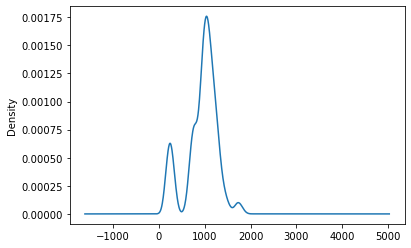

In [14]:
new_df['Average_Balance'].plot(kind = "density")

**Note**: We can add vertical lines with the mean and median values using the following coding:

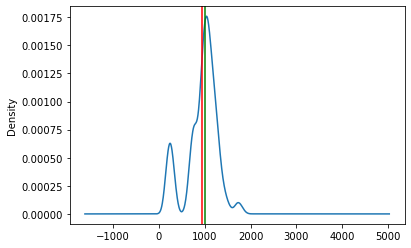

In [15]:
ax = new_df['Average_Balance'].plot(kind = "density")
ax.axvline(mean, color = 'red')
ax.axvline(median, color = 'green')

Same with the histogram plot bellow.

#### Histogram

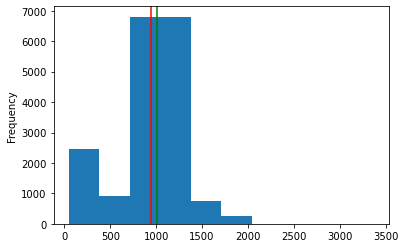

In [16]:
ax = new_df['Average_Balance'].plot(kind = "hist")
ax.axvline(mean, color = 'red')
ax.axvline(median, color = 'green')

### Categorical analysis and visualization

For this, is recomenden to use ages or a variable that can be grouped. For this, let's analyze the data frame and select the apropiated one.

In [17]:
new_df.head()

,Customer_Number,Offer_Accepted,Reward,Mailer_Type,Income_Level,#_Bank_Accounts_Open,Overdraft_Protection,Credit_Rating,#_Credit_Cards_Held,#_Homes_Owned,Household_Size,Own_Your_Home,Average_Balance,Q1_Balance,Q2_Balance,Q3_Balance,Q4_Balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0


For this example, let's analyze "Income_Level". This variable categorizes the level of incoming wages of each person.

In [18]:
 new_df['Income_Level'].value_counts()

Medium    9013
High      4526
Low       4461
Name: Income_Level, dtype: int64

Once get the values per group, we can proceed to plot it. For this, we will use a "pie plot" and a "bar plot". 


#### Pie plot.

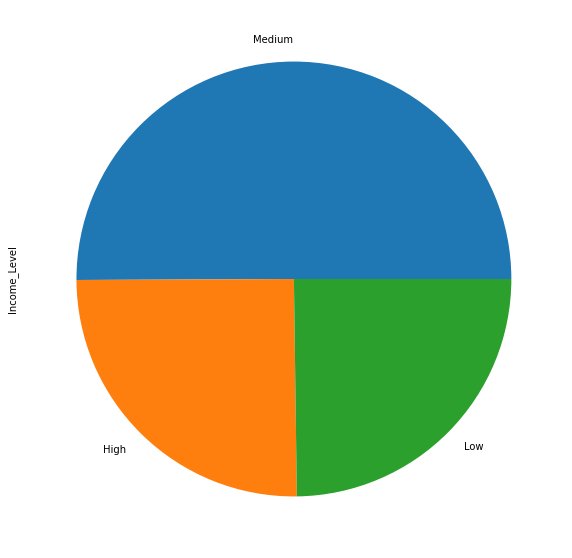

In [19]:
pl = new_df['Income_Level'].value_counts().plot(kind = 'pie', figsize = (10,10))
pl.tick_params(color = 'white')


#### Bar plot

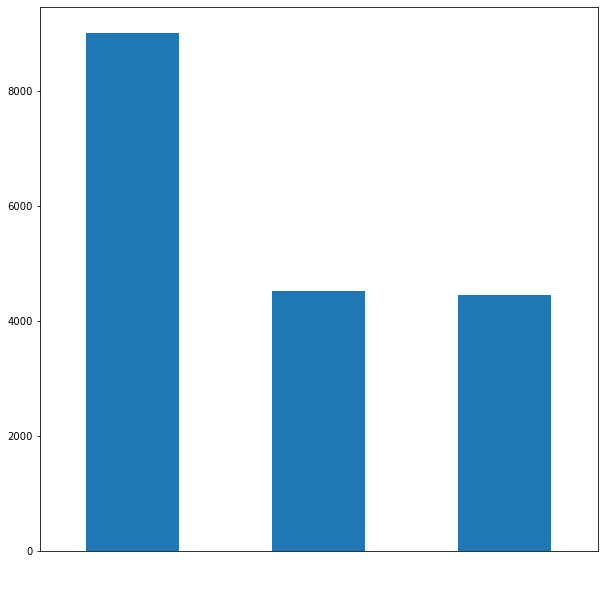

In [20]:
ax = new_df['Income_Level'].value_counts().plot(kind = 'bar', figsize = (10,10))
ax.tick_params(axis = 'x', colors = 'white')

### Relationship between the columns.

It's made with a heat map or correlation map. But first we need the correlation values of each variable, for this we use de function .corr(). Then, we can proceed to plot.

([<matplotlib.axis.YTick at 0x193d20d1280>,
 [Text(0, 0, 'Customer_Number'),
  Text(0, 1, '#_Bank_Accounts_Open'),
  Text(0, 2, '#_Credit_Cards_Held'),
  Text(0, 3, '#_Homes_Owned'),
  Text(0, 4, 'Household_Size'),
  Text(0, 5, 'Average_Balance'),
  Text(0, 6, 'Q1_Balance'),
  Text(0, 7, 'Q2_Balance'),
  Text(0, 8, 'Q3_Balance'),
  Text(0, 9, 'Q4_Balance')])

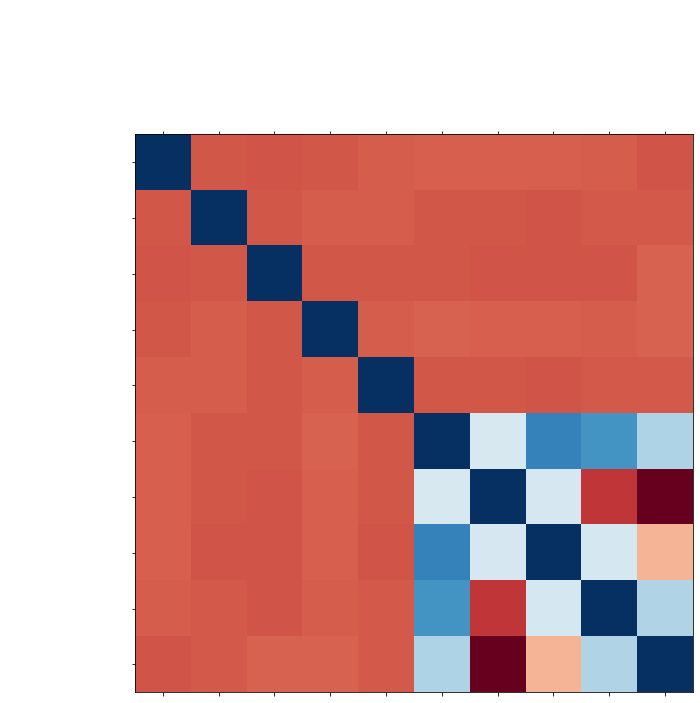

In [21]:
corr = new_df.corr()

fig = plt.figure(figsize = (10,10))
plt.matshow(corr, cmap = 'RdBu', fignum = fig.number)
plt.xticks(range(len(corr.columns)), corr.columns, rotation = 'vertical', color = 'white')
plt.yticks(range(len(corr.columns)), corr.columns, color = 'white')


### Read SQL database
We have to download "sqlite3" library. For this we use the PyP code "pip install db-sqlite3". 

In [22]:
pip install db-sqlite3

Note: you may need to restart the kernel to use updated packages.


In [23]:
new_df.head()

,Customer_Number,Offer_Accepted,Reward,Mailer_Type,Income_Level,#_Bank_Accounts_Open,Overdraft_Protection,Credit_Rating,#_Credit_Cards_Held,#_Homes_Owned,Household_Size,Own_Your_Home,Average_Balance,Q1_Balance,Q2_Balance,Q3_Balance,Q4_Balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0


.
.
.

## NumPy

Numeric computing library. Very efficient numeric tool. We don't use NumPy directly. In NumPy you can create arrays of data. Now, how to use NumPy? Let's see:

In [27]:
np.array([1,2,3,4,5])


array([1, 2, 3, 4, 5])

In [28]:
a = np.array([1,2,3,4,5])

In [29]:
a[0:]

array([1, 2, 3, 4, 5])

In [30]:
a[1:3]

array([2, 3])

Remember that the positions in one array are from 0 to infinite. So, if you want the first element of an array you have to put a 0 in the code. 
When you take an elements range, remember that it goes like [a, b), where a is the first element you will take (you take it) and b is the element that the range reachs (you don't take it)

You can create arrays whit more than one dimention. You can create it separating whith commas a simple array. Remember that when you want to go trough an array, the input will run (rows, columns). In other words, first input are the rows of the array (it could be named 'matrix' too) and the second input are the columns. 

NumPy have a lot of opperations, let's see some of them:

### summary statistics. 

You can obtain some statistics for a simple array as for a matrix. The way to obtain them is the following.



Let's create two arrays: one simple and one matrix

In [34]:
A = np.array([1,2,3,4,5])

B = np.array([[1,2,3], [4,5,6], [7,8,9]]) #Remember put the trhee arrays inside a []. So it will see like [ [a1], [a2], [a3] ]

For this arrays let's calculate:

#### Mean.

In [38]:
mean_A = np.mean(A)
mean_B = np.mean(B)

print("The mean of A is ",mean_A, " and the mean of B is ",mean_B )

The mean of A is  3.0  and the mean of B is  5.0


#### Summation.

In [37]:
suma_A = np.sum(A)
suma_B = np.sum(B)

print("The sum of A is ",suma_A, " and the sum of B is ",suma_B )

The sum of A is  15  and the sum of B is  45


#### Variance.

In [39]:
var_A = np.var(A)
var_B = np.var(B)

print("The var of A is ",var_A, " and the var of B is ",var_B )

The var of A is  2.0  and the var of B is  6.666666666666667


#### Standard deviation.

In [40]:
std_A = np.std(A)
std_B = np.std(B)

print("The std of A is ",std_A, " and the std of B is ",std_B )

The std of A is  1.4142135623730951  and the std of B is  2.581988897471611


### NumPy opperations.

#### Broadcasting and vectorized opperations.

You can opperate an entire array with other numbers (sum, difference, times, division) and the opperation will succed in every element of the array. For example: 

In [42]:
a = np.arange(10)

b = a + 15

print(b)

[15 16 17 18 19 20 21 22 23 24]


#### Boolean opperations

Important for conditional sentences. It evaluate a logical command and return a "True" if the condition is fullfiled, or a "False" if not. For example:

In [43]:
a>5

array([False, False, False, False, False, False,  True,  True,  True,
        True])

You can use this list of booleans to sort data and opperate that data that fulfill the condition using a conditional or something similar. 

#### Linear algebra.

Using matrix arrays you can transpose, invert and opperate aritmeticaly them. For this, the arrays must comply with the algebra rules, like dimension. 


## Pandas

Organize the data as a data frame similar to excel. It uses NumPy as support like matplotlib and a lot of other libraries. Data series can has a name, and the data series belong to a data frame. The data series has an indexing similar to a list. A data series is a column of a data frame. 

Some functions and methods that could be usefull in the future are:

- df.loc([...,...]): For localize a value or row that contains the value (or values) you're looking for. Note that the values you put in must be in '', becouse is data from the DataFrame
- df.iloc([...,...]): For localize the value in the position you want. Note that the value you put in is a integer. It could be only a number or a range instead. 



## Data Cleaning

For the data cleaning we're gonna see four steps.

#### Step one: Missing data
The simpliest problem to identify. Are the cells that have no information. You solve it filling it with the average of values (if they are numeric). Now, if you do need this data to move forward, you have to ask to the team for the data.

If there are missing values try to asume tha the data set is not cleaned already. 

#### Step two: Invalid values.
When the type of a value is different to the type of the column For example, you have a column for prices and you have a string or a text.
Other case is when you have a column for ages and there is, i.e. 170. This is a valid value, but it is not consistent to the domain of a human age. To determinate in this cases if a value is valid or not you have to know very well the domain of the data. 





Now, using NumPy you can clean the data by this methods:

- _pd.isnull(np.nan)_ converts every missing value to NaN
- _pd.isnull(None)_ converts every missing value to a empty value.
- _pd.isna(np.nan)_ 
- _pd.isna(None)_

**Note**: pd.isna() works the same way that pd.isnull() so you can use bough of them. 

The opposite function to this is

- _pd.notnull(np.nan)_ evaluate if there is a missing value


Bough of the methods results are a Boolean(True, False). 

### Opperations whit  missing values. 

You can filter the missing data looking for not null values or null values. You can add opperations like .sum() to count hw much values fulfill the condition. For series, isnull() and notnull() works as methods. It means you can type 

DataSeries.isnull()

And you will obtain the null values in your series. It works with 

DataSeries.notnull()

The last info works for DataFrames too!

Theres a new method that delete every row with at least one missing value.

### Data cleanning with DataFrames.

Every that saw for DataSeries works for DataFrames too. When you ask for the info using .info() you can see how many non-null vaues you have in every column. 

using $$ df.dropna(how = x)$$ you will drop rows that have x or more null values. For example, if you put $$ df.dropna(how = 'all')$$ python will drop all the rows that all its values are null values. 

If you want an specific amount of valid values you will use $$ df.dropna(thresh = x)$$ where x is an integer that means how many valid values you need. 


### Filling non-values.

Once you identify the non-values in your DataFrame, is simple to fix it. There are some methods:

#### Filling with a particular value.
You can fill the non-values with another value that wont afects significantly the data analysis. For example, you can fill with zeros (0) or with the mean.

For this, you have to use the method $$ df.fillna(x)$$ where x is zero or the mean.

#### Filling with close values. 
Replace the non-value with the closer value. This method doesn't works with border values, so you will have non-vlues as a result if the first and/or last value is non-value. To use this method you will type $$ df.fillna(method ='ffill').$$

 #### Fixing values out of the logical range. 
 - First: You have to identify the correct values and the outrange values. To see all the values you have, you use the methods $$ df.unique()$$ or $$df.value_counts()$$. Then, you can analize and determinate the outrange values and then fix it. 
To fix it you will have to use more complicated coding that involve to improve your coding and programming skills. 


### Cleaning duplicated values. 
A duplicated value is when you have a value por than once. You have to identify if the values are duplicated or it just repeat in the DataFrame, so the importance of know why the DataFrame was built for is essential. 

To work with duplicated values you can use the method $df.duplicated()$ and it will show you as a boolean which values are duplicated by marking as duplicated (True) the values after the first time python finds that value. You can keep the last value and mark th others as duplicated by using $df.duplicated(keep = 'last')$. 
You can drop the duplicated values marked as True with the method $df.drop_duplicated()$. 
Sometimes you need to keep one duplicated value beocuse the information in each rows is deferent, so you can drop the duplicated values by columns using as argument the name of the column you want. For example $df.drop_duplicate(**subset = [Column]**)

### Splitting columns.
Its used to have a cleanner text and pass from "Day_mont_year" to "Day Month Year" for example. For this, you have to use $$ df.str.split("_{-}")$$. Remember that you can change the separator by replace "_" with the one you want. 
There are a lot of methods to use with $$(df.str.)$$
Take present that when you split the values, you will have a DataFrame with all the splited values. 

### Data cleaning and visualizations. 
The visualization perspetive is very usefull to undertand the distribution and behavior of the data. You have to use the MathPlotLib and PyPlot libraries. This libraries has a global API that plots like MATLAB-style. 







